In [1]:
"""
created on Mar 23 2019

@author： Huan Zheng
"""
# 线性多分类

'\ncreated on Mar 23 2019\n\n@author： Huan Zheng\n'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

from sklearn.utils import shuffle
from matplotlib.colors import colorConverter, ListedColormap 
    
# 对于上面的fit可以这么扩展变成动态的
from sklearn.preprocessing import OneHotEncoder
def onehot(y,start,end):
    ohe = OneHotEncoder()
    a = np.linspace(start,end-1,end-start)
    b =np.reshape(a,[-1,1]).astype(np.int32)
    ohe.fit(b)
    c=ohe.transform(y).toarray()  
    return c     
#
    
def generate(sample_size, num_classes, diff,regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)  
    
    #len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))
        #print(X0, Y0)
    
  
    if regression==False: #one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0,[-1,1])        
        #print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32),0,num_classes)
        #print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X,Y  

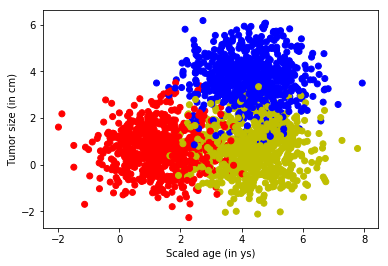

In [8]:
# 生成样本
np.random.seed(10)
input_dim = 2
num_classes = 3
X, Y = generate(2000, num_classes, [[3.0], [3.0, 0]], False)
aa = [np.argmax(l) for l in Y]
colors = ['r' if l == 0 else 'b' if l == 1 else 'y' for l in aa[:]]

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel("Scaled age (in ys)")
plt.ylabel("Tumor size (in cm)")
plt.show()

In [13]:
lab_dim = num_classes
# 定义占位符
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_labels = tf.placeholder(tf.float32, [None, lab_dim])
# 定义学习参数
W = tf.Variable(tf.random_normal([input_dim, lab_dim]), name='weight')
b = tf.Variable(tf.zeros([lab_dim]), name='bias')
output = tf.matmul(input_features, W) + b

z = tf.nn.softmax(output)

a1 = tf.argmax(tf.nn.softmax(output), axis=1) # 按行找出最大索引，生成数组

b1 = tf.argmax(input_features, axis=1)
err = tf.count_nonzero(a1 - b1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits( labels=input_lables,logits=output)
loss = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(0.04)

train = optimizer.minimize(loss)

Epoch: 0001 cost= 0.656125724 err= 3.6431999999999998
Epoch: 0002 cost= 0.414043576 err= 3.424800000000001
Epoch: 0003 cost= 0.332572669 err= 3.177600000000001
Epoch: 0004 cost= 0.297679305 err= 3.0768000000000004
Epoch: 0005 cost= 0.279113382 err= 3.0527999999999995
Epoch: 0006 cost= 0.268312186 err= 3.047999999999999
Epoch: 0007 cost= 0.261739314 err= 3.0407999999999986
Epoch: 0008 cost= 0.257637590 err= 3.035999999999999
Epoch: 0009 cost= 0.255056143 err= 3.0335999999999985
Epoch: 0010 cost= 0.253442824 err= 3.035999999999999
Epoch: 0011 cost= 0.252461076 err= 3.0335999999999985
Epoch: 0012 cost= 0.251898676 err= 3.026399999999999
Epoch: 0013 cost= 0.251618385 err= 3.0287999999999986
Epoch: 0014 cost= 0.251529276 err= 3.028799999999998
Epoch: 0015 cost= 0.251570612 err= 3.035999999999998
Epoch: 0016 cost= 0.251700759 err= 3.0335999999999985
Epoch: 0017 cost= 0.251890987 err= 3.0311999999999983
Epoch: 0018 cost= 0.252121329 err= 3.031199999999999
Epoch: 0019 cost= 0.252377778 err= 3.

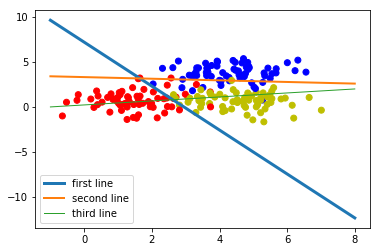

[[-2.8345635   0.168582    0.25169066]
 [-1.1636474   1.8737335  -1.1365    ]] [ 8.321012   -6.146916    0.22119723]


In [ ]:
max_epochs = 50
mini_batch_size = 50

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(max_epochs):
        sumerr = 0
        for i in range(np.int32(len(Y) / mini_batch_size)):
            x1 = X[i * mini_batch_size:(i + 1) * mini_batch_size, :]
            y1 = Y[i * mini_batch_size:(i + 1) * mini_batch_size, :]
            
            _, lossval, outputval, errval = sess.run([train, loss, output, err], feed_dict={input_features: x1, input_lables: y1})
            sumerr += (errval / mini_batch_size)
            
            sumerr =sumerr+(errval/minibatchSize)
        
        print ("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}".format(lossval),"err=",sumerr/minibatchSize)
        
    train_X, train_Y = generate(200, num_classes, [[3.0], [3.0, 0]], False)
    aa = [np.argmax(l) for l in train_Y]
    colors = ['r' if l == 0 else 'b' if l == 1 else 'y' for l in aa[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)
    
    x = np.linspace(-1,8,200) 

    y=-x*(sess.run(W)[0][0]/sess.run(W)[1][0])-sess.run(b)[0]/sess.run(W)[1][0]
    plt.plot(x,y, label='first line',lw=3)

    y=-x*(sess.run(W)[0][1]/sess.run(W)[1][1])-sess.run(b)[1]/sess.run(W)[1][1]
    plt.plot(x,y, label='second line',lw=2)

    y=-x*(sess.run(W)[0][2]/sess.run(W)[1][2])-sess.run(b)[2]/sess.run(W)[1][2]
    plt.plot(x,y, label='third line',lw=1)
    
    plt.legend()
    plt.show() 
    print(sess.run(W),sess.run(b))
    
    train_X, train_Y = generate(200,num_classes,  [[3.0],[3.0,0]],False)
    aa = [np.argmax(l) for l in train_Y]        
    colors =['r' if l == 0 else 'b' if l==1 else 'y' for l in aa[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)    
    
    nb_of_xs = 200
    xs1 = np.linspace(-1, 8, num=nb_of_xs)
    xs2 = np.linspace(-1, 8, num=nb_of_xs)
    xx, yy = np.meshgrid(xs1, xs2) # create the grid
    # Initialize and fill the classification plane
    classification_plane = np.zeros((nb_of_xs, nb_of_xs))
    for i in range(nb_of_xs):
        for j in range(nb_of_xs):
            #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
            classification_plane[i,j] = sess.run(a1, feed_dict={input_features: [[ xx[i,j], yy[i,j] ]]} )
    
    
    # Create a color map to show the classification colors of each grid point
    cmap = ListedColormap([
            colorConverter.to_rgba('r', alpha=0.30),
            colorConverter.to_rgba('b', alpha=0.30),
            colorConverter.to_rgba('y', alpha=0.30)])
    # Plot the classification plane with decision boundary and input samples
    plt.contourf(xx, yy, classification_plane, cmap=cmap)
    plt.show()    